In [200]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import locale

In [201]:
data = pd.read_csv("..\Data\clean_data_EDA.csv")

In [202]:
data

,company,title,gender,race,bins,country,region,totalyearlycompensation,yearsofexperience,yearsatcompany,education
0,other,Software Engineer,Male,White,L5,USA,USA,150000,5.0,2.0,3.0
1,other,Technical Program Manager,Male,Asian,L5,USA,USA,242000,20.0,0.0,4.0
2,other,Software Engineer,Other,Asian,L5,USA,USA,121000,0.0,0.0,3.0
3,other,Product Manager,Other,Unknown,L5,USA,USA,160000,4.0,2.0,4.0
4,other,Software Engineering Manager,Male,White,L5,USA,USA,150000,10.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...
23350,other,Software Engineer,Male,White,L6,USA,USA,210000,15.0,4.0,3.0
23351,other,Software Engineer,Other,Unknown,L6,USA,USA,200000,3.0,0.0,4.0
23352,other,Software Engineer,Male,White,L6,USA,USA,240000,2.0,0.0,3.0
23353,other,Software Engineer,Male,Unknown,L6,USA,USA,234000,5.0,0.0,4.0


In [203]:
mean_salary_by_position = data.groupby('title')["totalyearlycompensation"].mean().reset_index().sort_values(by='totalyearlycompensation', ascending=False)

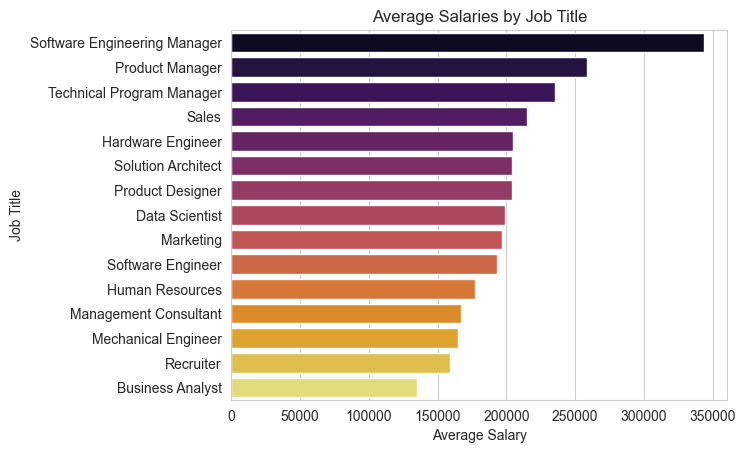

In [204]:
sns.set_style('whitegrid')
s = sns.barplot(data=mean_salary_by_position, y='title', x='totalyearlycompensation', palette='inferno')
s.set(ylabel='Job Title', xlabel='Average Salary', title='Average Salaries by Job Title')
#plt.ylabel('Job Title')
#plt.xlabel('Average Salary')
#plt.title('Average Salaries by Job Title')
plt.show()

In [205]:
s.figure.savefig('../Images/Avg_Salaries.png', bbox_inches = "tight")

In [206]:
# Looking at the offer on the market - which kind of positions are the most requested

In [207]:
positions_count = data.groupby('title')["totalyearlycompensation"].count().reset_index().sort_values(by='totalyearlycompensation', ascending=False)
positions_count

,title,totalyearlycompensation
11,Software Engineer,14918
8,Product Manager,1656
12,Software Engineering Manager,1207
1,Data Scientist,1026
2,Hardware Engineer,920
14,Technical Program Manager,688
7,Product Designer,560
4,Management Consultant,484
0,Business Analyst,432
13,Solution Architect,423


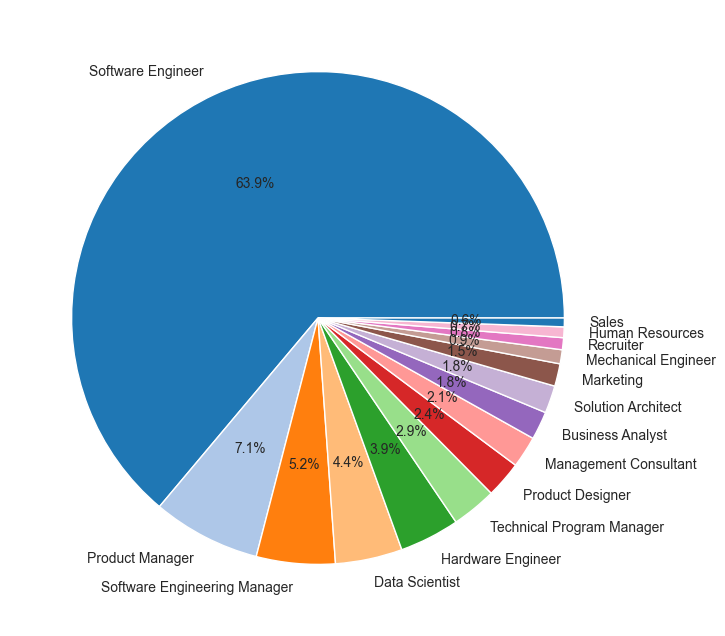

In [208]:
fig, ax = plt.subplots(figsize=(8, 8))
colors = sns.color_palette('tab20')[0:14]
pie = plt.pie(positions_count["totalyearlycompensation"], labels = positions_count["title"],colors = colors, autopct='%1.1f%%')
plt.show()

In [209]:
plt.savefig('../Images/Market_offer.png', bbox_inches = "tight")

<Figure size 640x480 with 0 Axes>

In [210]:
# Race as a factor:

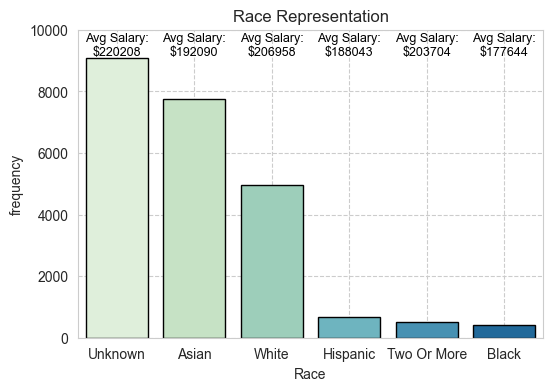

In [211]:
plt.figure(figsize=(6,4))
r = sns.countplot(data = data, x = 'race', palette="GnBu",edgecolor="black", order = data["race"].value_counts().index )
avg_salaries_r = data.groupby('race')['totalyearlycompensation'].mean()
r.set(ylabel='frequency', xlabel='Race', title = 'Race Representation')
for race, salary_r in avg_salaries_r.items():
    #salary_r = avg_salaries_r[i]
    formatted_salary_r = locale.format_string('%.0f', salary_r, grouping=True)
    race_index = data['race'].value_counts().index.tolist().index(race)
    r.annotate(f"Avg Salary:\n${formatted_salary_r}", (race_index, 0), ha='center', va='top', xytext=(0, 220),
               textcoords='offset points', fontsize=9, color='black')
plt.ylim(0, 10000)
plt.grid(axis='both', linestyle='--')

In [212]:
r.figure.savefig('../Images/Race.png', bbox_inches = "tight")

In [213]:
# Gender as a factor:

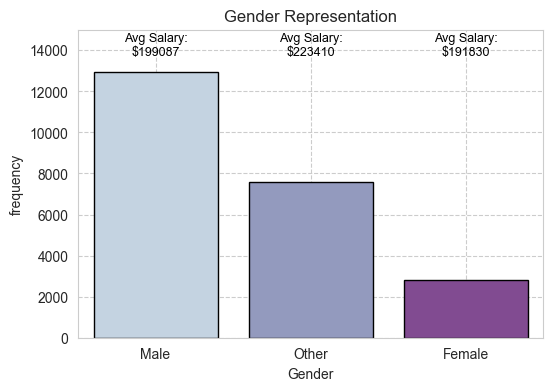

In [214]:
plt.figure(figsize=(6,4))
g = sns.countplot(data = data, x = 'gender', palette="BuPu",edgecolor="black", order = data["gender"].value_counts().index )
avg_salaries_g = data.groupby('gender')['totalyearlycompensation'].mean()
g.set(ylabel='frequency', xlabel='Gender', title = 'Gender Representation')
for gender, salary_g in avg_salaries_g.items():
    formatted_salary_g = locale.format_string('%.0f', salary_g, grouping=True)
    gender_index = data['gender'].value_counts().index.tolist().index(gender)
    g.annotate(f"Avg Salary:\n${formatted_salary_g}", (gender_index, 0), ha='center', va='top', xytext=(0, 220),
               textcoords='offset points', fontsize=9, color='black')
plt.ylim(0, 15000)
plt.grid(axis='both', linestyle='--')

In [215]:
g.figure.savefig('../Images/Gender.png', bbox_inches = "tight")

In [216]:
# Education as a factor:

In [217]:
def edu_level(x):
    if x == 1:
        return 'Highschool'
    elif x == 2:
        return "Some College"
    elif x == 3:
        return "Bachelors"
    elif x == 4:
        return "Masters"
    else:
        return "PhD"
    

data["education_level"] = data["education"].apply(edu_level)
data.head(2)

,company,title,gender,race,bins,country,region,totalyearlycompensation,yearsofexperience,yearsatcompany,education,education_level
0,other,Software Engineer,Male,White,L5,USA,USA,150000,5.0,2.0,3.0,Bachelors
1,other,Technical Program Manager,Male,Asian,L5,USA,USA,242000,20.0,0.0,4.0,Masters


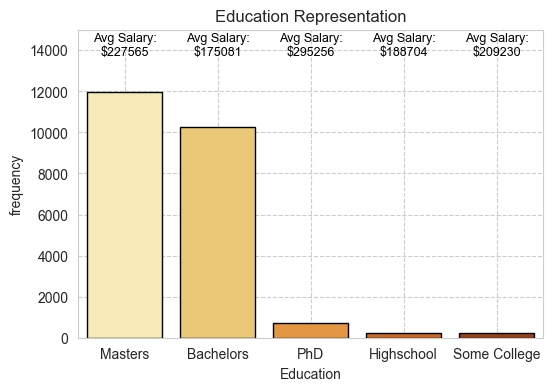

In [218]:
plt.figure(figsize=(6,4))
e = sns.countplot(data = data, x = 'education_level', palette="YlOrBr",edgecolor="black", order = data["education_level"].value_counts().index )
avg_salaries_e = data.groupby('education_level')['totalyearlycompensation'].mean()
e.set(ylabel='frequency', xlabel='Education', title = 'Education Representation')
for education_level, salary_e in avg_salaries_e.items():
    formatted_salary_e = locale.format_string('%.0f', salary_e, grouping=True)
    education_level_index = data['education_level'].value_counts().index.tolist().index(education_level)
    e.annotate(f"Avg Salary:\n${formatted_salary_e}", (education_level_index, 0), ha='center', va='top', xytext=(0, 220),
               textcoords='offset points', fontsize=9, color='black')
plt.ylim(0, 15000)
plt.grid(axis='both', linestyle='--')

In [219]:
e.figure.savefig('../Images/Education.png', bbox_inches = "tight")

In [220]:
# top employers in the inductry:

In [221]:
positions_by_employer = data.groupby('company')['title'].count().reset_index().sort_values(by='title', ascending=False)
positions_by_employer = positions_by_employer[positions_by_employer["company"] != "other"]

In [222]:
positions_by_employer

,company,title
2,Amazon,2849
20,Microsoft,1478
14,Google,1189
12,Facebook,1034
3,Apple,526
16,Intel,378
23,Oracle,371
15,IBM,339
8,Cisco,335
7,Capital One,309


In [223]:
top_10_employers = positions_by_employer.head(10)
top_10_employers

,company,title
2,Amazon,2849
20,Microsoft,1478
14,Google,1189
12,Facebook,1034
3,Apple,526
16,Intel,378
23,Oracle,371
15,IBM,339
8,Cisco,335
7,Capital One,309


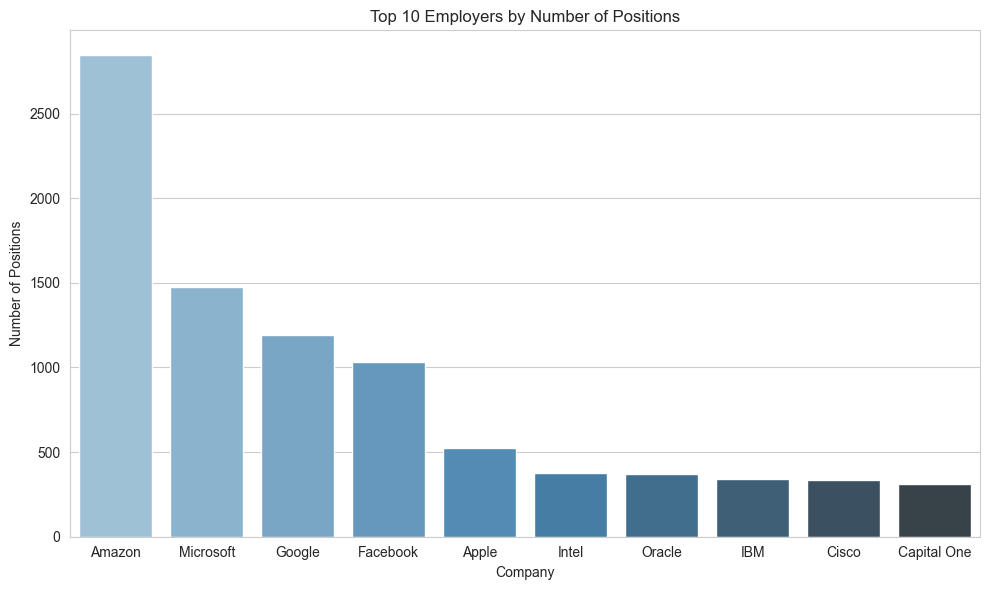

In [224]:
plt.figure(figsize=(10, 6))
emp = sns.barplot(data=top_10_employers, x='company', y='title', palette='Blues_d')
emp.set(ylabel='Number of Positions', xlabel='Company', title = 'Top 10 Employers by Number of Positions')
plt.tight_layout()
plt.show()

In [225]:
emp.figure.savefig('../Images/Top10-companies.png', bbox_inches = "tight")